# Done by Mohamad Alkadri

In [0]:
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeClassifier
from time import time
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,mean_squared_log_error
from sklearn.model_selection import KFold ,cross_validate, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, ParameterGrid
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC, SVR
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error
from time import time
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense,Dropout
from keras import Sequential
from google.colab import files


# Reading the data

In [0]:
data_path="https://raw.githubusercontent.com/Kadri314/cadmium_data_science/master/data.csv"
data_df=pd.read_csv(data_path)

In [0]:
data_df.head()

,Spring,aquifer,Cd_con,logged_cd,Type1industry,Type2industry,type3industry,type4industry,type5industry,type6industry,type7industry,type8industry,type9industry,Total_industry,MSWdumps,Multipledumps,Total_dump,burningdump,NoBurningdump,Operational,Non_operational,Type1agri,Type2agri,type3agri,type4agri,type5agri,type6agri,type7agri,type8agri,type9agri,type10agri,type11agri,type12agri,type13agri,type14agri,type15agri,Total_agri,Mean_disindustry,Median_disindustry,Min_disindustry,Max_disindustry,Mean_yrs,Median_yrs,Min_yrs,Max_yrs,Mean_volume,Median_volume,Min_volume,Max_volume,Mean_area,Median_area,Min_area,Max_area,Mean_distdump,Median_distdump,Min_distdump,Max_distdump,Mean_areaagri,Median_areaagri,Min_areaagri,Max_areaagri,Mean_distagri,Median_distagri,Min_distagri,Max_distagri,Distance_Zouk,Slope,Precipitation,Traffic,SlopeInd
0,ras el haref,27b,1.0000,0.0,1,0,0,0,1.0,4,3,1,0,10,10,2,12,1,11,10,2,27,7,0,8,746,342,65,397,5,0,37,81,19,2,45,1781,7468.10,6974.81,1717.59,10925.57,6.67,3.0,3,23,996.88,200,10.0,5100,1029.17,300,20,5100,8394.92,7768.15,3330.45,17487.87,22754.45,5146.0,236,1965571,10768.59,9246.53,322.76,24805.02,36.7,1.99,1200,0,1.20
1,Ain Jrain,28,1.0000,0.0,0,1,0,0,0.0,0,0,0,0,1,1,1,2,0,2,1,1,35,32,0,25,1317,963,122,952,51,5,106,221,47,13,91,3980,16872.43,16872.43,16872.43,16872.43,10.50,10.5,3,18,1250.00,1250,1000.0,1500,875.00,875,750,1000,18669.39,18669.39,5962.25,31376.52,24059.80,4285.5,91,3957842,33258.78,36155.12,203.77,58814.80,30.7,2.76,1500,0,0.26
2,saoufar,28,1.0000,0.0,0,2,0,0,0.0,0,1,0,0,3,1,3,4,1,3,2,2,35,32,0,25,1317,963,122,952,51,5,106,221,47,13,91,3980,28682.65,32551.45,20881.81,32614.69,10.00,9.5,3,18,1000.00,1000,500.0,1500,687.50,625,500,1000,15109.64,15910.13,1343.77,27274.53,24059.80,4285.5,91,3957842,17371.62,15777.75,187.85,44121.59,37.9,0.81,1200,0,1.27
3,Ain Kany,28,1.0000,0.0,1,2,1,1,0.0,4,7,5,1,22,8,3,11,1,10,8,3,35,32,0,25,1317,963,122,952,51,5,106,221,47,13,91,3980,19187.69,16673.93,2183.85,51174.22,6.36,3.0,3,18,1257.27,1000,15.0,6750,919.54,500,15,4500,21752.46,19128.81,5825.24,45967.76,24059.80,4285.5,91,3957842,21437.08,15193.91,154.85,63097.15,81.9,0.45,1200,0,0.74
4,Chartoun,28,2.0195,0.7,2,3,1,1,0.0,4,7,6,1,25,8,3,11,1,10,8,3,35,32,0,25,1317,963,122,952,51,5,106,221,47,13,91,3980,11119.29,6667.18,5484.46,41435.91,6.36,3.0,3,18,1257.27,1000,15.0,6750,919.55,500,15,4500,14785.40,11851.60,3132.42,36695.97,24059.80,4285.5,91,3957842,16334.16,9214.03,318.44,53610.62,40.1,0.02,1200,0,0.09


In [0]:
data_df.columns

Index(['Spring', 'aquifer', 'Cd_con', 'logged_cd', 'Type1industry',
       'Type2industry', 'type3industry', 'type4industry', 'type5industry',
       'type6industry', 'type7industry', 'type8industry', 'type9industry',
       'Total_industry', 'MSWdumps', 'Multipledumps', 'Total_dump',
       'burningdump ', 'NoBurningdump', 'Operational', 'Non_operational',
       'Type1agri', 'Type2agri', 'type3agri', 'type4agri', 'type5agri',
       'type6agri', 'type7agri', 'type8agri', 'type9agri', 'type10agri',
       'type11agri', 'type12agri', 'type13agri', 'type14agri', 'type15agri',
       'Total_agri', 'Mean_disindustry', 'Median_disindustry',
       'Min_disindustry', 'Max_disindustry', 'Mean_yrs', 'Median_yrs',
       'Min_yrs', 'Max_yrs', 'Mean_volume', 'Median_volume', 'Min_volume',
       'Max_volume', 'Mean_area', 'Median_area', 'Min_area', 'Max_area',
       'Mean_distdump', 'Median_distdump', 'Min_distdump', 'Max_distdump',
       'Mean_areaagri', 'Median_areaagri', 'Min_areaagri', 'M

In [0]:
data_df.info()
# We have one empty  enrty of the following feature:
#     type5industry              30 non-null float64
# we have two empty entries of the following feature:
#     Slope                      29 non-null float64



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 70 columns):
Spring                31 non-null object
aquifer               31 non-null object
Cd_con                31 non-null float64
logged_cd             31 non-null float64
Type1industry         31 non-null int64
Type2industry         31 non-null int64
type3industry         31 non-null int64
type4industry         31 non-null int64
type5industry         30 non-null float64
type6industry         31 non-null int64
type7industry         31 non-null int64
type8industry         31 non-null int64
type9industry         31 non-null int64
Total_industry        31 non-null int64
MSWdumps              31 non-null int64
Multipledumps         31 non-null int64
Total_dump            31 non-null int64
burningdump           31 non-null int64
NoBurningdump         31 non-null int64
Operational           31 non-null int64
Non_operational       31 non-null int64
Type1agri             31 non-null int64
Type2agri

#  Looking for NaN entries 

In [0]:
data_df[pd.isnull(data_df).any(axis=1)][["Spring","type5industry","Slope"]]

,Spring,type5industry,Slope
13,Ain el saydeh,NaN,0.79


In [0]:
#Replacing the Nan slope with the mean of other slopes 
# data_df['Slope'].fillna((data_df['Slope'].mean()), inplace=True)
# Replacing the value of type5industry with Nan value with 0 value 
data_df['type5industry'].fillna(0, inplace=True)


In [0]:
data_df[pd.isnull(data_df).any(axis=1)][["Spring","type5industry","Slope"]]

,Spring,type5industry,Slope


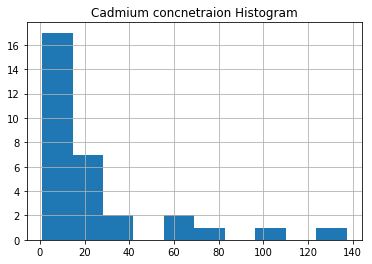

In [0]:
from google.colab import files
#plotting histogram for Cadmium concnetraion 
data_df["Cd_con"].hist()
plt.title("Cadmium concnetraion Histogram")
plt.savefig("histo.png")
files.download("histo.png") 
plt.show()


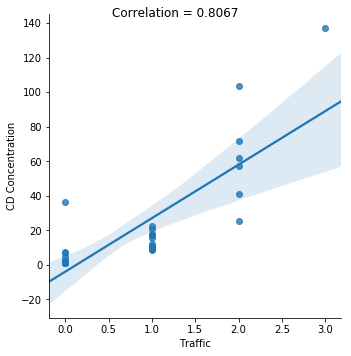

In [0]:
# plot correlation plot between traffic and Cadmium concnetraion
cor=df["Cd_con"].corr(data_df["Traffic"])
cor=float("{0:.4f}".format(cor))
axis=sns.lmplot(x="Traffic",y="Cd_con",data=data_df,fit_reg=True) 
plt.xlabel("Traffic")
plt.ylabel("CD Concentration")
plt.suptitle("Correlation = "+str( cor))
plt.savefig("/home/cmps299/Desktop/Data Science /Data Science project/scatter plots/"+"Traffic")
plt.show()

In [0]:
#Describtion of the CD_con column 
data_df.Cd_con.describe()

count     31.000000
mean      24.001398
std       31.885968
min        1.000000
25%        5.717900
50%       11.079600
75%       23.751450
max      137.259700
Name: Cd_con, dtype: float64

In [0]:
#checking cloumns' name
data_df.columns

Index(['Spring', 'aquifer', 'Cd_con', 'logged_cd', 'Type1industry',
       'Type2industry', 'type3industry', 'type4industry', 'type5industry',
       'type6industry', 'type7industry', 'type8industry', 'type9industry',
       'Total_industry', 'MSWdumps', 'Multipledumps', 'Total_dump',
       'burningdump ', 'NoBurningdump', 'Operational', 'Non_operational',
       'Type1agri', 'Type2agri', 'type3agri', 'type4agri', 'type5agri',
       'type6agri', 'type7agri', 'type8agri', 'type9agri', 'type10agri',
       'type11agri', 'type12agri', 'type13agri', 'type14agri', 'type15agri',
       'Total_agri', 'Mean_disindustry', 'Median_disindustry',
       'Min_disindustry', 'Max_disindustry', 'Mean_yrs', 'Median_yrs',
       'Min_yrs', 'Max_yrs', 'Mean_volume', 'Median_volume', 'Min_volume',
       'Max_volume', 'Mean_area', 'Median_area', 'Min_area', 'Max_area',
       'Mean_distdump', 'Median_distdump', 'Min_distdump', 'Max_distdump',
       'Mean_areaagri', 'Median_areaagri', 'Min_areaagri', 'M

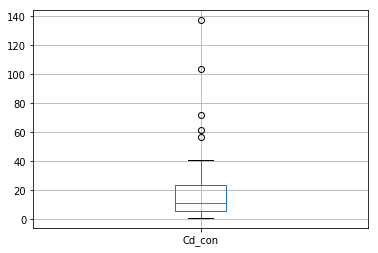

In [0]:
#draw boxplot for Cd_con feature 
data_df.boxplot(column="Cd_con")

We can notice from the box plot that ever point above 40 is considered as an outlier

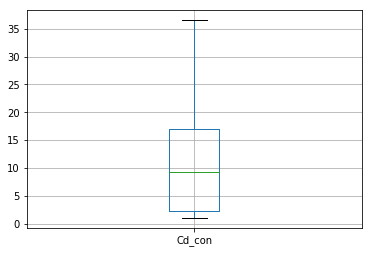

In [0]:
# Remove outliers with CD higher than 40 
new_df=data_df[data_df.Cd_con<=40]
new_df.boxplot(column="Cd_con")

In [0]:
#Describtion of the CD_con column after removing outlier points 
new_df.Cd_con.describe()

count    25.000000
mean     10.855310
std       8.976238
min       1.000000
25%       2.274500
50%       9.219500
75%      16.979100
max      36.515000
Name: Cd_con, dtype: float64

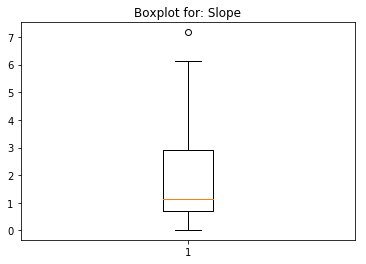

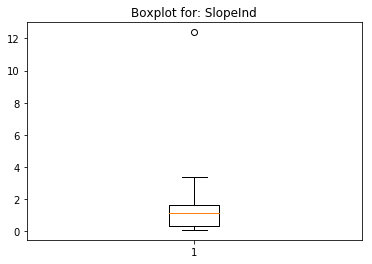

In [0]:
#plot box plot for all features: 
for col in ["Slope","SlopeInd"]:
    if is_numeric_dtype(data_df[col]):
        plt.boxplot(data_df[col])
        plt.title("Boxplot for: "+col)
        plt.savefig(col+".png")
        files.download(col+".png")
        plt.show()

In [0]:
# plot the scatter plots for each feature with CD_Con: 
dic={}
for col in data_df.columns:
    if is_numeric_dtype(data_df[col]) and col!="Cd_con":
        cor=df["Cd_con"].corr(data_df[col])
        cor=float("{0:.4f}".format(cor))
        axis=sns.lmplot(x="Cd_con",y=col,data=data_df,fit_reg=True) 
        plt.xlabel(col)
        plt.ylabel("CD Concentration")
        plt.suptitle("Correlation = "+str( cor))
#         plt.savefig("/home/cmps299/Desktop/Data Science /Data Science project/scatter plots/"+col)
        plt.show()
        dic[col]=df["Cd_con"].corr(data_df[col])

NameError: ignored

In [0]:
# looking for the correlation between features and CD_C in sorted from top corellated into lowest
for i in range(0,len(dic.keys())//2):
    maxi=max(dic, key=dic.get)
    mini=min(dic, key=dic.get)
    print(maxi+" corr with CD_C ="+str(df["Cd_con"].corr(data_df[maxi])))
    print("---------------------------------------------------------------")
    print(mini+" corr with CD_C ="+str(df["Cd_con"].corr(data_df[mini])))
    print("---------------------------------------------------------------")
    if maxi in dic:
        del dic[maxi]
    if mini in dic:
        del dic[mini]

logged_cd corr with CD_C =0.7989051255457809
---------------------------------------------------------------
type8industry corr with CD_C =-0.34129469530125994
---------------------------------------------------------------
Slope corr with CD_C =0.438323849823396
---------------------------------------------------------------
Max_distdump corr with CD_C =-0.33811710896216657
---------------------------------------------------------------
Precipitation corr with CD_C =0.3304868093635846
---------------------------------------------------------------
type9industry corr with CD_C =-0.3293859182100005
---------------------------------------------------------------
Median_distagri corr with CD_C =0.2889873548428493
---------------------------------------------------------------
Multipledumps corr with CD_C =-0.32253406733397155
---------------------------------------------------------------
type5industry corr with CD_C =0.24114249305573987
---------------------------------------------------

# Please Ignore the below cells, as they are used just for testing

# Scalling

In [0]:
#Scalling features between -1 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_df.loc[:,"Type1industry":])
scaled_data= scaler.transform(data_df.loc[:,"Type1industry":])
cols=data_df.columns[4:]

In [0]:
scaled_data.shape
y=data_df["Cd_con"]
X=scaled_data

# Generateing learning curve in term of features

In [0]:
# learning curve for MLP model
feature_examples=range(1,65)
training_scores=[]
cross_vali_scores=[]
for i in range (5,data_df.shape[1]):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler.fit(data_df.iloc[:,4:i])
    scaled_data= scaler.transform(data_df.iloc[:,4:i])
    y=data_df["Cd_con"]
    X=scaled_data
    # data is ready
    loo = LeaveOneOut()
    n_splits=loo.get_n_splits(X)  
    kf = KFold(n_splits=31)

    #Build NR 
    model = Sequential()
    model.add(Dense(512, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dropout(rate=0.50))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.50))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate=0.50))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(rate=0.50))

    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    mse_train_scores=[]
    mse_test_scores=[]
    counter=1
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        hst=model.fit(x=X_train,y=y_train,batch_size=1,epochs=100,validation_data=(X_test,y_test),verbose=0)
        pred=model.predict(X_test)
        mse=mean_squared_error(y_test,pred)
        mse_test_scores.append(mse)
        
        pred=model.predict(X_train)
        mse=mean_squared_error(y_train,pred)
        mse_train_scores.append(mse)
    
        print("done fold#",counter)
        counter+=1
    print("done for",i)
    cross_vali_scores.append(np.average(mse_test_scores))
    training_scores.append(np.average(mse_train_scores))




done fold# 1
done fold# 2
done fold# 3
done fold# 4
done fold# 5
done fold# 6
done fold# 7
done fold# 8
done fold# 9
done fold# 10
done fold# 11
done fold# 12
done fold# 13
done fold# 14
done fold# 15
done fold# 16
done fold# 17
done fold# 18
done fold# 19
done fold# 20
done fold# 21
done fold# 22
done fold# 23
done fold# 24
done fold# 25
done fold# 26
done fold# 27
done fold# 28
done fold# 29
done fold# 30
done fold# 31
done for 68
done fold# 1
done fold# 2
done fold# 3
done fold# 4
done fold# 5
done fold# 6
done fold# 7
done fold# 8
done fold# 9
done fold# 10
done fold# 11
done fold# 12
done fold# 13
done fold# 14
done fold# 15
done fold# 16
done fold# 17
done fold# 18
done fold# 19
done fold# 20
done fold# 21
done fold# 22
done fold# 23
done fold# 24
done fold# 25
done fold# 26
done fold# 27
done fold# 28
done fold# 29
done fold# 30
done fold# 31
done for 69


In [0]:
#  (learning curves) For SVM (Poly)
feature_examples=range(1,65)
training_scores=[]
cross_vali_scores=[]
#create the model 
poly_svr= SVR(**{'C': 1, 'degree': 6, 'gamma': 1, 'kernel': 'poly'})
for i in range (5,data_df.shape[1]):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler.fit(data_df.iloc[:,4:i])
    scaled_data= scaler.transform(data_df.iloc[:,4:i])
    y=data_df["Cd_con"]
    X=scaled_data
    # data is ready
    loo = LeaveOneOut()
    n_splits=loo.get_n_splits( X)  
    kf = KFold(n_splits=31)

   
    mse_train_scores=[]
    mse_test_scores=[]
    counter=1
    for train_index, test_index in kf.split( X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        poly_svr.fit(X_train,y_train) 
        pred=poly_svr.predict(X_test)
        mse=mean_squared_error(y_test,pred)
        mse_test_scores.append(mse)
        
        pred=poly_svr.predict(X_train)
        mse=mean_squared_error(y_train,pred)
        mse_train_scores.append(mse)
    
        print("done fold#",counter)
        counter+=1
    print("done for",i)
    cross_vali_scores.append(np.average(mse_test_scores))
    training_scores.append(np.average(mse_train_scores))




done fold# 1
done fold# 2
done fold# 3
done fold# 4
done fold# 5
done fold# 6
done fold# 7
done fold# 8
done fold# 9
done fold# 10
done fold# 11
done fold# 12
done fold# 13
done fold# 14
done fold# 15
done fold# 16
done fold# 17
done fold# 18
done fold# 19
done fold# 20
done fold# 21
done fold# 22
done fold# 23
done fold# 24
done fold# 25
done fold# 26
done fold# 27
done fold# 28
done fold# 29
done fold# 30
done fold# 31
done for 5
done fold# 1
done fold# 2
done fold# 3
done fold# 4
done fold# 5
done fold# 6
done fold# 7
done fold# 8
done fold# 9
done fold# 10
done fold# 11
done fold# 12
done fold# 13
done fold# 14
done fold# 15
done fold# 16
done fold# 17
done fold# 18
done fold# 19
done fold# 20
done fold# 21
done fold# 22
done fold# 23
done fold# 24
done fold# 25
done fold# 26
done fold# 27
done fold# 28
done fold# 29
done fold# 30
done fold# 31
done for 6
done fold# 1
done fold# 2
done fold# 3
done fold# 4
done fold# 5
done fold# 6
done fold# 7
done fold# 8
done fold# 9
done fold# 

done fold# 5
done fold# 6
done fold# 7
done fold# 8
done fold# 9
done fold# 10
done fold# 11
done fold# 12
done fold# 13
done fold# 14
done fold# 15
done fold# 16
done fold# 17
done fold# 18
done fold# 19
done fold# 20
done fold# 21
done fold# 22
done fold# 23
done fold# 24
done fold# 25
done fold# 26
done fold# 27
done fold# 28
done fold# 29
done fold# 30
done fold# 31
done for 24
done fold# 1
done fold# 2
done fold# 3
done fold# 4
done fold# 5
done fold# 6
done fold# 7
done fold# 8
done fold# 9
done fold# 10
done fold# 11
done fold# 12
done fold# 13
done fold# 14
done fold# 15
done fold# 16
done fold# 17
done fold# 18
done fold# 19
done fold# 20
done fold# 21
done fold# 22
done fold# 23
done fold# 24
done fold# 25
done fold# 26
done fold# 27
done fold# 28
done fold# 29
done fold# 30
done fold# 31
done for 25
done fold# 1
done fold# 2
done fold# 3
done fold# 4
done fold# 5
done fold# 6
done fold# 7
done fold# 8
done fold# 9
done fold# 10
done fold# 11
done fold# 12
done fold# 13
done 

done fold# 23
done fold# 24
done fold# 25
done fold# 26
done fold# 27
done fold# 28
done fold# 29
done fold# 30
done fold# 31
done for 43
done fold# 1
done fold# 2
done fold# 3
done fold# 4
done fold# 5
done fold# 6
done fold# 7
done fold# 8
done fold# 9
done fold# 10
done fold# 11
done fold# 12
done fold# 13
done fold# 14
done fold# 15
done fold# 16
done fold# 17
done fold# 18
done fold# 19
done fold# 20
done fold# 21
done fold# 22
done fold# 23
done fold# 24
done fold# 25
done fold# 26
done fold# 27
done fold# 28
done fold# 29
done fold# 30
done fold# 31
done for 44
done fold# 1
done fold# 2
done fold# 3
done fold# 4
done fold# 5
done fold# 6
done fold# 7
done fold# 8
done fold# 9
done fold# 10
done fold# 11
done fold# 12
done fold# 13
done fold# 14
done fold# 15
done fold# 16
done fold# 17
done fold# 18
done fold# 19
done fold# 20
done fold# 21
done fold# 22
done fold# 23
done fold# 24
done fold# 25
done fold# 26
done fold# 27
done fold# 28
done fold# 29
done fold# 30
done fold# 31


done fold# 1
done fold# 2
done fold# 3
done fold# 4
done fold# 5
done fold# 6
done fold# 7
done fold# 8
done fold# 9
done fold# 10
done fold# 11
done fold# 12
done fold# 13
done fold# 14
done fold# 15
done fold# 16
done fold# 17
done fold# 18
done fold# 19
done fold# 20
done fold# 21
done fold# 22
done fold# 23
done fold# 24
done fold# 25
done fold# 26
done fold# 27
done fold# 28
done fold# 29
done fold# 30
done fold# 31
done for 63
done fold# 1
done fold# 2
done fold# 3
done fold# 4
done fold# 5
done fold# 6
done fold# 7
done fold# 8
done fold# 9
done fold# 10
done fold# 11
done fold# 12
done fold# 13
done fold# 14
done fold# 15
done fold# 16
done fold# 17
done fold# 18
done fold# 19
done fold# 20
done fold# 21
done fold# 22
done fold# 23
done fold# 24
done fold# 25
done fold# 26
done fold# 27
done fold# 28
done fold# 29
done fold# 30
done fold# 31
done for 64
done fold# 1
done fold# 2
done fold# 3
done fold# 4
done fold# 5
done fold# 6
done fold# 7
done fold# 8
done fold# 9
done fold

In [0]:
#Scores for MLP
training_scores=[927.5434734253283, 793.926722824217, 813.3144154057965, 824.1280075448906, 759.101101507796, 759.702671690429, 712.9280872159037, 733.9633384246164, 737.5175015719834, 750.855919943454, 758.1542595441489, 622.5269708421487, 615.0284678417172, 637.9745199957728, 629.961942119633, 627.7833253401031, 633.9244115029455, 632.9053428142709, 616.2574969004797, 632.5279620499502,641.1410894313688, 636.1533654750767, 623.7426060318035, 628.6831321787615, 630.1644785997757, 646.1086443844266, 637.1834336692782, 643.6322217922961, 655.366310290599, 650.0304958883969, 657.2922535010051, 654.4751563446689, 643.5224038461786,624.1007168988725, 576.8365438473941, 555.5063675789921, 453.154239982314,454.02286426355226, 393.46816366978624, 400.7965245787081, 374.89978487153354, 389.92394691897846, 384.0840228283322, 389.09599212373286,401.43687253670214, 345.49946097150746, 357.1431532082756, 369.0514688849664, 360.4441204046824, 324.9150295076776,327.00769334379277, 346.8530824757127, 331.47816888731626, 337.5452952180166, 306.33788192639287, 333.642667503329, 336.22226761147164, 337.15957565728667, 334.7822126737267, 130.36352111971715, 97.87849940940326, 136.93314517233387, 132.09947216877305, 112.87855346259254, 117.87001576464353]

In [0]:
#Scores for MLP
cross_vali_scores=[1080.1113740769304, 1172.5429599017896, 1117.5275454944212, 1128.0025143506257, 995.423224239531, 978.863710747313, 940.2536457093253, 926.5848215074465, 960.5640322683709, 844.5549586308599, 956.0252588494903, 1017.53977573188, 1095.479468056219, 939.8445654474875, 1133.2545429836835, 1089.0196632703748, 946.6557518182947, 843.5761506811166, 961.3338698228978, 870.1978702825444, 985.5145706635028, 972.943216693762, 903.6711352365005, 990.5569386075086, 1050.1252061981702, 926.4688629709832, 940.2265531423459, 935.9330954718854, 897.304151670892, 929.0101387465331, 978.0012709083906, 944.1672964700434, 973.9843814091608, 1023.3217680768402, 1021.0438777129045, 1242.9868487689837, 1080.0495147478618, 937.35040595049, 977.1774799147706,996.2882508017667, 986.2250352137123, 1029.6688644311575, 889.6835133566533, 1106.6899470963465, 1058.0214255813453, 1279.3028314185437, 1005.6358455573425, 934.9459013767502, 957.5930316013504, 826.135973739137, 641.031387136462, 683.5142578068917, 657.4077603294241, 691.0352230704398, 707.7851185433716, 961.3000196624623, 840.8695524872821,863.7441907550768, 738.4087714564846, 238.52968209870036,169.98831525604206, 304.17765379601485, 168.51334988406887, 266.10993080690264, 173.72930047494563]

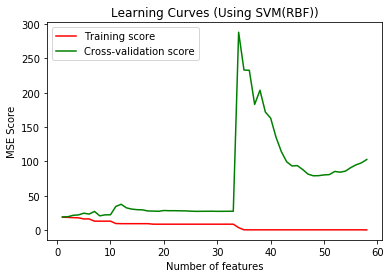

In [0]:
train_sizes=range(1,65)
plt.figure()
plt.title("Learning Curves (Using SVM(RBF))")
plt.xlabel("Number of features")
plt.ylabel("MSE Score")

plt.plot(train_sizes[:-6],training_scores[:-6], color="r",label="Training score")
plt.plot(train_sizes[:-6],cross_vali_scores[:-6], color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

# Feautre Selection 

# Decision trees

Feature ranking:
1. feature 64 (0.764550)
2. feature 62 (0.073262)
3. feature 59 (0.011435)
4. feature 51 (0.010385)
5. feature 60 (0.010196)
6. feature 35 (0.008308)
7. feature 23 (0.005815)
8. feature 40 (0.005040)
9. feature 22 (0.004904)
10. feature 34 (0.004895)
11. feature 55 (0.004691)
12. feature 54 (0.004645)
13. feature 30 (0.004489)
14. feature 41 (0.003993)
15. feature 53 (0.003916)
16. feature 57 (0.003845)
17. feature 21 (0.003820)
18. feature 31 (0.003804)
19. feature 25 (0.003740)
20. feature 58 (0.003717)
21. feature 32 (0.003475)
22. feature 50 (0.003404)
23. feature 20 (0.003383)
24. feature 26 (0.003328)
25. feature 24 (0.003271)
26. feature 28 (0.003237)
27. feature 18 (0.003024)
28. feature 27 (0.002950)
29. feature 49 (0.002553)
30. feature 39 (0.002506)
31. feature 56 (0.002462)
32. feature 45 (0.002392)
33. feature 36 (0.002208)
34. feature 37 (0.001855)
35. feature 11 (0.001838)
36. feature 17 (0.001823)
37. feature 29 (0.001775)
38. feature 52 (0.001395)
39. 

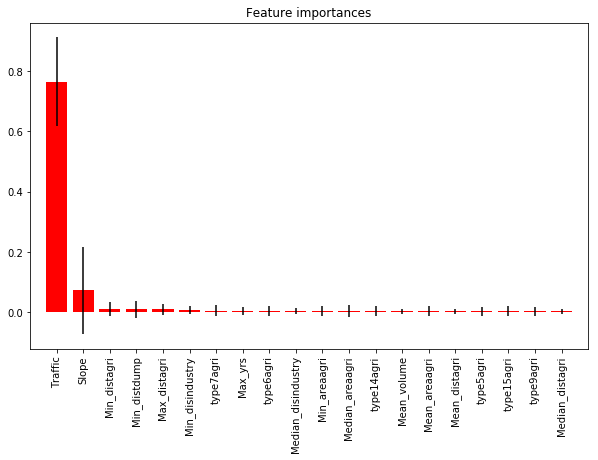

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor



# Build a forest and compute the feature importances
forest = ExtraTreesRegressor(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indices_DT=indices

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(10,6))
plt.title("Feature importances")
label_max=20
plt.bar(range(0,label_max), importances[indices[0:label_max]],
       color="r", yerr=std[indices[0:label_max]], align="center")
plt.xticks(range(0,label_max), cols[indices[0:label_max]],rotation='vertical')
plt.xlim([-1, label_max])
plt.savefig("/home/cmps299/Desktop/Data Science /Data Science project/feature_importances")

plt.show()

# Univariate feature selection

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
model = SelectKBest(f_regression)
X_new=model.fit_transform(X, y)
X_new.shape

(31, 10)

Feature ranking:
1. feature 64 (54.051149)
2. feature 62 (6.896767)
3. feature 7 (3.823329)
4. feature 52 (3.743321)
5. feature 63 (3.555794)
6. feature 8 (3.529265)
7. feature 11 (3.367091)
8. feature 6 (2.958773)
9. feature 58 (2.642589)
10. feature 16 (2.336338)
11. feature 61 (2.315913)
12. feature 59 (2.087469)
13. feature 41 (2.060734)
14. feature 49 (1.998227)
15. feature 36 (1.892193)
16. feature 4 (1.790456)
17. feature 9 (1.756265)
18. feature 0 (1.750862)
19. feature 45 (1.713478)
20. feature 57 (1.647927)
21. feature 42 (1.431031)
22. feature 13 (1.416323)
23. feature 44 (1.387893)
24. feature 48 (1.330114)
25. feature 2 (1.254863)
26. feature 40 (1.249471)
27. feature 3 (1.211568)
28. feature 12 (1.149018)
29. feature 50 (1.097035)
30. feature 14 (1.070165)
31. feature 46 (0.989773)
32. feature 1 (0.980353)
33. feature 10 (0.784337)
34. feature 15 (0.714386)
35. feature 33 (0.364883)
36. feature 55 (0.241046)
37. feature 34 (0.235871)
38. feature 19 (0.217958)
39. feature 

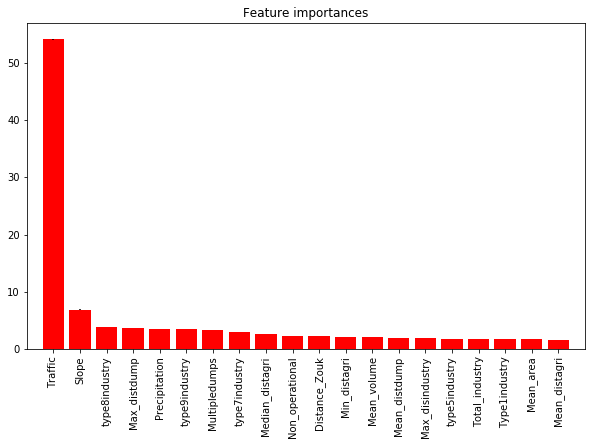

In [0]:
importances=model.scores_
indices = np.argsort(importances)[::-1]
indices_UN=indices
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(10,6))
plt.title("Feature importances")
label_max=20
plt.bar(range(0,label_max), importances[indices[0:label_max]],
       color="r", yerr=std[indices[0:label_max]], align="center")
plt.xticks(range(0,label_max), cols[indices[0:label_max]],rotation='vertical')
plt.xlim([-1, label_max])
plt.savefig("/home/cmps299/Desktop/Data Science /Data Science project/feature_importances")

plt.show()

# PCA

In [0]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
pca.fit(X)
X_PCA=pca.transform(X)

# Modeling 

In [0]:
top_features_DT=data_df[cols[indices_DT[0:5]]]
top_features_UV=data_df[cols[indices_UN[0:5]]]
# scalling
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(top_features_DT)
scaled_data_DT= scaler.transform(top_features_DT)

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(top_features_UV)
scaled_data_UV= scaler.transform(top_features_UV)

In [0]:
# specify the size of splits for one leave out cross validation
n_splits=31
# leave one out cross validation


In [0]:
# MLP for PCA data 
loo = LeaveOneOut()
n_splits=loo.get_n_splits(X_PCA)  
kf = KFold(n_splits=n_splits)

#Build NR 
model = Sequential()
model.add(Dense(512, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.50))

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.50))

model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.50))

model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
mse_scores=[]
mae_scores=[]
msle_scores=[]
rmse_scores=[]
preds=[]
y_true=[]
counter=0

for train_index, test_index in kf.split(X_PCA):
    X_train, X_test = X_PCA[train_index], X_PCA[test_index]
    y_train, y_test = y[train_index], y[test_index]
    hst=model.fit(x=X_train,y=y_train,batch_size=1,epochs=100,validation_data=(X_test,y_test),verbose=0)
    pred=model.predict(X_test)
    mse=mean_squared_error(y_test,pred)
    mae=mean_absolute_error(y_test,pred)
    msle=mean_squared_log_error(y_test,pred)
    
    mse_scores.append(mse)
    mae_scores.append(mae)
    msle_scores.append(msle)
    rmse_scores.append(np.sqrt(mse))

    preds.append(pred)
    y_true.append(y_test.values[0])
    counter+=1
    print("done fold#",counter)




done fold# 1
done fold# 2
done fold# 3
done fold# 4
done fold# 5
done fold# 6
done fold# 7
done fold# 8
done fold# 9
done fold# 10
done fold# 11
done fold# 12
done fold# 13
done fold# 14
done fold# 15
done fold# 16
done fold# 17
done fold# 18
done fold# 19
done fold# 20
done fold# 21
done fold# 22
done fold# 23
done fold# 24
done fold# 25
done fold# 26
done fold# 27
done fold# 28
done fold# 29
done fold# 30
done fold# 31


In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
preds=np.reshape(preds,(31))
y_true=np.array(y_true)                 
mean_absolute_percentage_error(y_true,preds)

261.1483402534416

In [0]:
print("PCA avg of MAE:",np.average(mae_scores))
print("PCA avg of MSE:",np.average(mse_scores))
print("PCA avg of MSLE:",np.average(msle_scores))
print("PCA avg of RMSE:",np.sqrt(np.average(mse_scores)))
df=pd.DataFrame(
    {'lst1Title': y_true,
     'lst2Title': np.reshape(preds,(31))
    })

df["lst1Title"].corr(df["lst2Title"])


PCA avg of MAE: 10.829120193752164
PCA avg of MSE: 350.1564901532901
PCA avg of MSLE: 0.7892837441082018
PCA avg of RMSE: 18.712468841745338


0.8513645412401152

In [0]:
# MLP for features selected by decision trees

loo = LeaveOneOut()
n_splits=loo.get_n_splits(scaled_data_DT)  
kf = KFold(n_splits=n_splits)

#Build NR 
model = Sequential()
model.add(Dense(512, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.50))

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.50))

model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.50))

model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
mse_scores=[]
mae_scores=[]
msle_scores=[]
preds=[]
y_true=[]
counter=0

for train_index, test_index in kf.split(scaled_data_DT):
    X_train, X_test = scaled_data_DT[train_index], scaled_data_DT[test_index]
    y_train, y_test = y[train_index], y[test_index]
    hst=model.fit(x=X_train,y=y_train,batch_size=1,epochs=100,validation_data=(X_test,y_test),verbose=0)
    pred=model.predict(X_test)
    mse=mean_squared_error(y_test,pred)
    mae=mean_absolute_error(y_test,pred)
    msle=mean_squared_log_error(y_test,pred)

    mse_scores.append(mse)
    mae_scores.append(mae)
    msle_scores.append(msle)
    preds.append(pred)
    y_true.append(y_test.values[0])
    counter+=1
    print("done fold#",counter)




done fold# 1
done fold# 2
done fold# 3
done fold# 4
done fold# 5
done fold# 6
done fold# 7
done fold# 8
done fold# 9
done fold# 10
done fold# 11
done fold# 12
done fold# 13
done fold# 14
done fold# 15
done fold# 16
done fold# 17
done fold# 18
done fold# 19
done fold# 20
done fold# 21
done fold# 22
done fold# 23
done fold# 24
done fold# 25
done fold# 26
done fold# 27
done fold# 28
done fold# 29
done fold# 30
done fold# 31


In [0]:
preds=np.reshape(preds,(31))
y_true=np.array(y_true)                 
mean_absolute_percentage_error(y_true,preds)

43.42912461190302

In [0]:
# with 5 features
print("DT avg of MAE:",np.average(mae_scores))
print("DT avg of MSE:",np.average(mse_scores))
print("DT avg of MSLE:",np.average(msle_scores))

print("DT avg of RMSE:",np.sqrt(np.average(mse_scores)))
df=pd.DataFrame(
    {'lst1Title': y_true,
     'lst2Title': np.reshape(preds,(31))
    })

df["lst1Title"].corr(df["lst2Title"])

DT avg of MAE: 4.515383506011963
DT avg of MSE: 82.68762345322584
DT avg of MSLE: 0.1057690299405462
DT avg of RMSE: 9.09327352790104


0.9887560126952002

In [0]:
# MLP fir Univariate feature selection

loo = LeaveOneOut()
n_splits=loo.get_n_splits(scaled_data_UV)  
kf = KFold(n_splits=n_splits)

#Build NR 
model = Sequential()
model.add(Dense(512, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.50))

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.50))

model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.50))

model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
mse_scores=[]
mae_scores=[]
msle_scores=[]
preds=[]
y_true=[]
counter=0

for train_index, test_index in kf.split(scaled_data_UV):
    X_train, X_test = scaled_data_UV[train_index], scaled_data_UV[test_index]
    y_train, y_test = y[train_index], y[test_index]
    hst=model.fit(x=X_train,y=y_train,batch_size=1,epochs=100,validation_data=(X_test,y_test),verbose=0)
    pred=model.predict(X_test)
    mse=mean_squared_error(y_test,pred)
    mae=mean_absolute_error(y_test,pred)
    msle=mean_squared_log_error(y_test,pred)

    mse_scores.append(mse)
    mae_scores.append(mae)
    msle_scores.append(msle)

    preds.append(pred)
    y_true.append(y_test.values[0])
    counter+=1
    print("done fold#",counter)




done fold# 1
done fold# 2
done fold# 3
done fold# 4
done fold# 5
done fold# 6
done fold# 7
done fold# 8
done fold# 9
done fold# 10
done fold# 11
done fold# 12
done fold# 13
done fold# 14
done fold# 15
done fold# 16
done fold# 17
done fold# 18
done fold# 19
done fold# 20
done fold# 21
done fold# 22
done fold# 23
done fold# 24
done fold# 25
done fold# 26
done fold# 27
done fold# 28
done fold# 29
done fold# 30
done fold# 31


In [0]:
preds=np.reshape(preds,(31))
y_true=np.array(y_true)                 
mean_absolute_percentage_error(y_true,preds)

44.42476391391159

In [0]:
# for 5 features 
print("UV avg of MAE:",np.average(mae_scores))
print("UV avg of MSE:",np.average(mse_scores))
print("UV avg of MSLE:",np.average(msle_scores))
print("UV avg of RMSE:",np.sqrt(np.average(mse_scores)))

df=pd.DataFrame(
    {'lst1Title': y_true,
     'lst2Title': np.reshape(preds,(31))
    })

df["lst1Title"].corr(df["lst2Title"])


UV avg of MAE: 6.164928938865661
UV avg of MSE: 126.61726396489318
UV avg of MSLE: 0.15590587691252805
UV avg of RMSE: 11.252433690757444


0.9654648376313525

# Applying SVM 

In [0]:
n_splits=31

In [0]:
# specify the size of splits for one leave out cross validation

# leave one out cross validation
loo = LeaveOneOut()
n_splits=loo.get_n_splits(X)  
kf = KFold(n_splits=n_splits)

In [0]:

#apply SVR using  polynomial Kernal for PCA data

current=time()

#create the model 
poly_svr= SVR()

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [0.1,0.5,1,10, 1000]}]

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['poly'], 'gamma': [1e-3,1e-5,1e-6,1e-7, 1e-4,1e-2,1e-1,1],'degree':[2,3,4,5,6,7,8,9],
                     'C': [0.0001,0.001,0.01,0.1,0.5,1,10,1000]}]


best_parameters=None
top_mean_mse_error=10000000
top_mean_mae_error=10000000
top_mean_msle_error=10000000
top_y_true=[]
top_preds=[]



mse_scores=[]
mae_scores=[]
msle_scores=[]


print("# Tuning hyper-parameters" )
print()
# Simulating grid search 
for g in ParameterGrid(tuned_parameters):
    # for each possible combination in the grid
    poly_svr= SVR(**g)
    scores=[]
    y_true=[]
    preds=[]
    # doing 1 leave out cross validation
    for train_index, test_index in kf.split(X_PCA):
        X_train, X_test = X_PCA[train_index], X_PCA[test_index]
        y_train, y_test = y[train_index], y[test_index]
        poly_svr.fit(X_train,y_train)
        pred=poly_svr.predict(X_test)
        mse=mean_squared_error(y_test,pred)
        mae=mean_absolute_error(y_test,pred)
#         msle=mean_squared_log_error(y_test,pred)
        
        mse_scores.append(mse)
        mae_scores.append(mae)
#         msle_scores.append(msle)
        preds.append(pred)
        y_true.append(y_test.values[0])

    if np.mean(mse_scores) < top_mean_mse_error:
        top_mean_mse_error=np.mean(mse_scores) 
        top_mean_mae_error=np.mean(mae_scores) 
#         top_mean_msle_error=np.mean(msle_scores) 
        top_y_true=y_true
        top_preds=preds

        best_parameters=g
    
    print("Done for: "+str(g))
    
 
      
print("It took "+ str((time()-current)/60)+" mins")



# Tuning hyper-parameters

Done for: {'C': 0.0001, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 0.01, 'ke

Done for: {'C': 0.001, 'degree': 8, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 8, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, '

Done for: {'C': 0.1, 'degree': 8, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 8, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 8, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 8, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 8, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 8, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 8, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 8, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 0.1, 'kerne

Done for: {'C': 1, 'degree': 7, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 7, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 7, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 9, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 9, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 9, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 9, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 1, 'deg

Done for: {'C': 1000, 'degree': 7, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 7, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 7, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 9, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 9, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 9, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 9, 'gamma': 1e-

In [0]:
#report MAPE

preds=np.reshape(preds,(31))
y_true=np.array(y_true)                 
mean_absolute_percentage_error(y_true,preds)

22707.927686194496

In [0]:
print(top_mean_mse_error,top_mean_mae_error)
print(best_parameters)
print("RMSE:",np.sqrt(top_mean_mse_error))
df=pd.DataFrame(
    {'lst1Title': top_y_true,
     'lst2Title': np.reshape(np.array(top_preds),(31))
    })

print(df["lst1Title"].corr(df["lst2Title"]))


1157.18449957443 19.05637180217973 10000000
{'C': 0.0001, 'degree': 4, 'gamma': 1, 'kernel': 'poly'}
RMSE: 34.01741465153444
0.09686123529540272


In [0]:
#apply SVR using  polynomial Kernal for features selected by decision trees

current=time()

#create the model 


# # Set the parameters by cross-validation
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [0.1,0.5,1,10, 1000]}]

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['poly'], 'gamma': [1e-3,1e-5,1e-6,1e-7, 1e-4,1e-2,1e-1,1],'degree':[2,3,4,5,6,7,8,9],
                     'C': [0.0001,0.001,0.01,0.1,0.5,1,10,1000]}]


best_parameters=None
top_mean_mse_error=10000000
top_mean_mae_error=10000000
top_mean_msle_error=10000000
top_y_true=[]
top_preds=[]


mse_scores=[]
mae_scores=[]
msle_scores=[]

print("# Tuning hyper-parameters" )
print()
# Simulating grid search 
for g in ParameterGrid(tuned_parameters):
    # for each possible combination in the grid
    poly_svr= SVR(**g)
    scores=[]
    y_true=[]
    preds=[]
    # doing 1 leave out cross validation
    for train_index, test_index in kf.split(scaled_data_DT):
        X_train, X_test = scaled_data_DT[train_index], scaled_data_DT[test_index]
        y_train, y_test = y[train_index], y[test_index]
        poly_svr.fit(X_train,y_train)
        pred=poly_svr.predict(X_test)
        mse=mean_squared_error(y_test,pred)
        mae=mean_absolute_error(y_test,pred)
#         msle=mean_squared_log_error(y_test,pred)
        mse_scores.append(mse)
        mae_scores.append(mae)
#         msle_scores.append(msle)
        preds.append(pred)
        y_true.append(y_test.values[0])

    if np.mean(mse_scores) < top_mean_mse_error:
        top_mean_mse_error=np.mean(mse_scores) 
        top_mean_mae_error=np.mean(mae_scores) 
#         top_mean_msle_error=np.mean(msle_scores) 
        top_y_true=y_true
        top_preds=preds

        best_parameters=g
    
    print("Done for: "+str(g))
    
 
      
print("It took "+ str((time()-current)/60)+" mins")



# Tuning hyper-parameters

Done for: {'C': 0.0001, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 0.01, 'ke

Done for: {'C': 0.001, 'degree': 8, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2,

Done for: {'C': 0.1, 'degree': 8, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 8, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 8, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 8, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 8, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 8, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 0.5, 'degree': 2, 'gamma': 0.001, 'kernel': 

Done for: {'C': 1, 'degree': 8, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 9, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 9, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 9, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 9, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 9, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 9, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 9, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 1,

Done for: {'C': 1000, 'degree': 7, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 7, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 7, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 7, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 9, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 9, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 9, 'gamma': 1e

In [0]:
#report MAPE

preds=np.reshape(preds,(31))
y_true=np.array(y_true)                 
mean_absolute_percentage_error(y_true,preds)

4132.219165038552

In [0]:
print(top_mean_mse_error,top_mean_mae_error)
print(best_parameters)
print("RMSE:",np.sqrt(top_mean_mse_error))
df=pd.DataFrame(
    {'lst1Title': top_y_true,
     'lst2Title': np.reshape(np.array(top_preds),(31))
    })

print(df["lst1Title"].corr(df["lst2Title"]))


1155.1578799561223 19.030838835631684 0.10441408412257513
{'C': 1, 'degree': 6, 'gamma': 1, 'kernel': 'poly'}
RMSE: 33.98761362549778
0.29491825511284264


In [0]:
#apply SVR using  polynomial Kernal for features selected by Univariate feature selection
 

current=time()

#create the model 
poly_svr= SVR()

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [0.1,0.5,1,10, 1000]}]

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['poly'], 'gamma': [1e-3,1e-5,1e-6,1e-7, 1e-4,1e-2,1e-1,1],'degree':[2,3,4,5,6,7,8,9],
                     'C': [0.0001,0.001,0.01,0.1,0.5,1,10,1000]}]


best_parameters=None
top_mean_mse_error=10000000
top_mean_mae_error=10000000
top_mean_msle_error=10000000
top_y_true=[]
top_preds=[]


mse_scores=[]
mae_scores=[]
msle_scores=[]

print("# Tuning hyper-parameters" )
print()
# Simulating grid search 
for g in ParameterGrid(tuned_parameters):
    # for each possible combination in the grid
    poly_svr= SVR(**g)
    y_true=[]
    preds=[]
    # doing 1 leave out cross validation
    for train_index, test_index in kf.split(scaled_data_UV):
        X_train, X_test = scaled_data_UV[train_index], scaled_data_UV[test_index]
        y_train, y_test = y[train_index], y[test_index]
        poly_svr.fit(X_train,y_train)
        pred=poly_svr.predict(X_test)
        mse=mean_squared_error(y_test,pred)
        mae=mean_absolute_error(y_test,pred)
#         msle=mean_squared_log_error(y_test,pred)
        mse_scores.append(mse)
        mae_scores.append(mae)
        msle_scores.append(msle)
        preds.append(pred)
        y_true.append(y_test.values[0])

    if np.mean(mse_scores) < top_mean_mse_error:
        top_mean_mse_error=np.mean(mse_scores) 
        top_mean_mae_error=np.mean(mae_scores) 
#         top_mean_msle_error=np.mean(msle_scores) 
        top_y_true=y_true
        top_preds=preds

        best_parameters=g
    
    print("Done for: "+str(g))
    
 
      
print("It took "+ str((time()-current)/60)+" mins")



# Tuning hyper-parameters

Done for: {'C': 0.0001, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 0.01, 'ke

Done for: {'C': 0.001, 'degree': 8, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2,

Done for: {'C': 0.1, 'degree': 8, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 8, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 8, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 8, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 8, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 8, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 0.5, 'degree': 2, 'gamma': 0.001, 'kernel': 

Done for: {'C': 1, 'degree': 8, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 8, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 9, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 9, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 9, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 9, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 9, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 9, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 1, 'degree': 9, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 1,

Done for: {'C': 1000, 'degree': 7, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 7, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 7, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 8, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 9, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 9, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 9, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 1000, 'degree': 9, 'gamma': 1e-

In [0]:
#report MAPE

preds=np.reshape(preds,(31))
y_true=np.array(y_true)                 
mean_absolute_percentage_error(y_true,preds)

3648.405639279067

In [0]:
print(top_mean_mse_error,top_mean_mae_error)
print(best_parameters)
print("RMSE:",np.sqrt(top_mean_mse_error))
df=pd.DataFrame(
    {'lst1Title': top_y_true,
     'lst2Title': np.reshape(np.array(top_preds),(31))
    })

print(df["lst1Title"].corr(df["lst2Title"]))


1152.4067456554224 18.998705150035047 0.10441408412257511
{'C': 0.1, 'degree': 8, 'gamma': 1, 'kernel': 'poly'}
RMSE: 33.9471168975426
0.5609076321051851


In [0]:
#apply SVR using  RBF Kernal for PCA data

current=time()

#create the model 
rbf_svr= SVR()

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3,1e-5,1e-6,1e-7, 1e-4,1e-2,1e-1,1],
                     'C': [0.0001,0.001,0.01,0.1,0.5,1,10,1000]}]



best_parameters=None
top_mean_mse_error=10000000
top_mean_mae_error=10000000
top_mean_msle_error=10000000



y_true=[]
preds=[]
mse_scores=[]
mae_scores=[]
msle_scores=[]
print("# Tuning hyper-parameters" )
print()
# Simulating grid search 
for g in ParameterGrid(tuned_parameters):
    # for each possible combination in the grid
    poly_svr= SVR(**g)
    scores=[]
    y_true=[]
    preds=[]
    # doing 1 leave out cross validation
    for train_index, test_index in kf.split(X_PCA):
        X_train, X_test = X_PCA[train_index], X_PCA[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rbf_svr.fit(X_train,y_train)
        pred=rbf_svr.predict(X_test)
        mse=mean_squared_error(y_test,pred)
        mae=mean_absolute_error(y_test,pred)
        msle=mean_squared_log_error(y_test,pred)
        mse_scores.append(mse)
        mae_scores.append(mae)
#         msle_scores.append(msle)
        preds.append(pred)
        y_true.append(y_test.values[0])

    if np.mean(mse_scores) < top_mean_mse_error:
        top_mean_mse_error=np.mean(mse_scores) 
        top_mean_mae_error=np.mean(mae_scores) 
#         top_mean_msle_error=np.mean(msle_scores) 
        best_parameters_rbf=g
        top_y_true=y_true
        top_preds=preds
    
    print("Done for: "+str(g))
    
 
      
print("It took "+ str((time()-current)/60)+" mins")



# Tuning hyper-parameters

Done for: {'C': 0.0001, 'gamma': 0.001, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 1e-05, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 1e-06, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 1e-07, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}


/home/cmps299/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cmps299/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Done for: {'C': 0.0001, 'gamma': 0.01, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 1, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 1e-06, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 1e-07, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}
Done for: {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
Done for: {'C': 0.01, 'gamma': 1e-05, 'kernel': 'rbf'}
Done for: {'C': 0.01, 'gamma': 1e-06, 'kernel': 'rbf'}
Done for: {'C': 0.01, 'gamma': 1e-07, 'kernel': 'rbf'}
Done for: {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
Done for: {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
Done for: {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
Done for: {

In [0]:
#report MAPE

preds=np.reshape(preds,(31))
y_true=np.array(y_true)                 
mean_absolute_percentage_error(y_true,preds)

248.4127703692713

In [0]:
print(top_mean_mse_error,top_mean_mae_error)
print(best_parameters)
print("RMSE:",np.sqrt(top_mean_mse_error))
df=pd.DataFrame(
    {'lst1Title': top_y_true,
     'lst2Title': np.reshape(np.array(top_preds),(31))
    })

print(df["lst1Title"].corr(df["lst2Title"]))


1102.5466166342019 18.596465008542562 nan
None
RMSE: 33.2046173993046
0.1720548989875028


In [0]:
#apply SVR using  RBF Kernal for features selected by decision trees

current=time()

#create the model 
rbf_svr= SVR()

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3,1e-5,1e-6,1e-7, 1e-4,1e-2,1e-1,1],
                     'C': [0.0001,0.001,0.01,0.1,0.5,1,10,1000]}]



best_parameters=None
top_mean_mse_error=10000000
top_mean_mae_error=10000000
top_mean_msle_error=10000000



y_true=[]
preds=[]
mse_scores=[]
mae_scores=[]
msle_scores=[]
print("# Tuning hyper-parameters" )
print()
# Simulating grid search 
for g in ParameterGrid(tuned_parameters):
    # for each possible combination in the grid
    poly_svr= SVR(**g)
    scores=[]
    y_true=[]
    preds=[]
    # doing 1 leave out cross validation
    for train_index, test_index in kf.split(scaled_data_DT):
        X_train, X_test = scaled_data_DT[train_index], scaled_data_DT[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rbf_svr.fit(X_train,y_train)
        pred=rbf_svr.predict(X_test)
        mse=mean_squared_error(y_test,pred)
        mae=mean_absolute_error(y_test,pred)
#         msle=mean_squared_log_error(y_test,pred)
        mse_scores.append(mse)
        mae_scores.append(mae)
#         msle_scores.append(msle)
        preds.append(pred)
        y_true.append(y_test.values[0])

    if np.mean(mse_scores) < top_mean_mse_error:
        top_mean_mse_error=np.mean(mse_scores) 
        top_mean_mae_error=np.mean(mae_scores) 
#         top_mean_msle_error=np.mean(msle_scores) 
        best_parameters_rbf=g
        top_y_true=y_true
        top_preds=preds
    
    print("Done for: "+str(g))
    
 
      
print("It took "+ str((time()-current)/60)+" mins")



# Tuning hyper-parameters

Done for: {'C': 0.0001, 'gamma': 0.001, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 1e-05, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 1e-06, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 1e-07, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 0.01, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 1, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 1e-06, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 1e-07, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}
Done for: {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
Done for: {'C': 0.01, 'gam

In [0]:
#report MAPE

preds=np.reshape(preds,(31))
y_true=np.array(y_true)                 
mean_absolute_percentage_error(y_true,preds)

194.23588368361726

In [0]:
print(top_mean_mse_error,top_mean_mae_error)
print(best_parameters_rbf)
print("RMSE:",np.sqrt(top_mean_mse_error))
df=pd.DataFrame(
    {'lst1Title': top_y_true,
     'lst2Title': np.reshape(np.array(top_preds),(31))
    })

print(df["lst1Title"].corr(df["lst2Title"]))


1097.7286959286016 18.197059030609665 4.789074640273063
{'C': 0.0001, 'gamma': 0.001, 'kernel': 'rbf'}
RMSE: 33.131989012563096
0.6022306214305619


In [0]:
#apply SVR using  RBF Kernal for features selected by Univariate feature selection

current=time()

#create the model 
rbf_svr= SVR()

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3,1e-5,1e-6,1e-7, 1e-4,1e-2,1e-1,1],
                     'C': [0.0001,0.001,0.01,0.1,0.5,1,10,1000]}]



best_parameters=None
top_mean_mse_error=10000000
top_mean_mae_error=10000000
top_mean_msle_error=10000000

top_y_true=[]
top_preds=[]


mse_scores=[]
mae_scores=[]
msle_scores=[]
print("# Tuning hyper-parameters" )
print()
# Simulating grid search 
for g in ParameterGrid(tuned_parameters):
    # for each possible combination in the grid
    poly_svr= SVR(**g)
    scores=[]
    y_true=[]
    preds=[]
    # doing 1 leave out cross validation
    for train_index, test_index in kf.split(scaled_data_UV):
        X_train, X_test = scaled_data_UV[train_index], scaled_data_UV[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rbf_svr.fit(X_train,y_train)
        pred=rbf_svr.predict(X_test)
        mse=mean_squared_error(y_test,pred)
        mae=mean_absolute_error(y_test,pred)
#         msle=mean_squared_log_error(y_test,pred)
        mse_scores.append(mse)
        mae_scores.append(mae)
#         msle_scores.append(msle)
        preds.append(pred)
        y_true.append(y_test.values[0])

    if np.mean(mse_scores) < top_mean_mse_error:
        top_mean_mse_error=np.mean(mse_scores) 
        top_mean_mae_error=np.mean(mae_scores) 
#         top_mean_msle_error=np.mean(msle_scores) 
        best_parameters_rbf=g
        top_y_true=y_true
        top_preds=preds
    
    print("Done for: "+str(g))
    
 
      
print("It took "+ str((time()-current)/60)+" mins")



# Tuning hyper-parameters

Done for: {'C': 0.0001, 'gamma': 0.001, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 1e-05, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 1e-06, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 1e-07, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 0.01, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 1, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 1e-06, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 1e-07, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}
Done for: {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
Done for: {'C': 0.01, 'gam

In [0]:
#report MAPE
preds=np.reshape(preds,(31))
y_true=np.array(y_true)                 
mean_absolute_percentage_error(y_true,preds)

226.27309134714145

In [0]:
print(top_mean_mse_error,top_mean_mae_error)
print(best_parameters)
print("RMSE:",np.sqrt(top_mean_mse_error))
df=pd.DataFrame(
    {'lst1Title': top_y_true,
     'lst2Title': np.reshape(np.array(top_preds),(31))
    })

print(df["lst1Title"].corr(df["lst2Title"]))


1076.0431031921614 18.35166298113296 4.789074640273061
None
RMSE: 32.80309593913601
0.38156745190732216


# Classification  part is done By Hassan. Check his notebook

In [0]:
# data_df.columns

Index(['Spring', 'aquifer', 'Cd_con', 'logged_cd', 'Type1industry',
       'Type2industry', 'type3industry', 'type4industry', 'type5industry',
       'type6industry', 'type7industry', 'type8industry', 'type9industry',
       'Total_industry', 'MSWdumps', 'Multipledumps', 'Total_dump',
       'burningdump ', 'NoBurningdump', 'Operational', 'Non_operational',
       'Type1agri', 'Type2agri', 'type3agri', 'type4agri', 'type5agri',
       'type6agri', 'type7agri', 'type8agri', 'type9agri', 'type10agri',
       'type11agri', 'type12agri', 'type13agri', 'type14agri', 'type15agri',
       'Total_agri', 'Mean_disindustry', 'Median_disindustry',
       'Min_disindustry', 'Max_disindustry', 'Mean_yrs', 'Median_yrs',
       'Min_yrs', 'Max_yrs', 'Mean_volume', 'Median_volume', 'Min_volume',
       'Max_volume', 'Mean_area', 'Median_area', 'Min_area', 'Max_area',
       'Mean_distdump', 'Median_distdump', 'Min_distdump', 'Max_distdump',
       'Mean_areaagri', 'Median_areaagri', 'Min_areaagri', 'M

In [0]:
# data_df["label"]=  np.where(data_df['Cd_con']<=5, 'Safe', 'Dangerous')

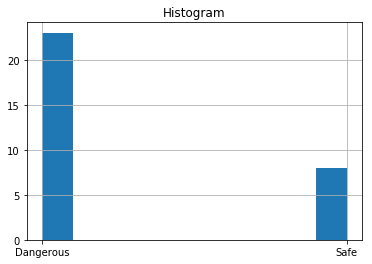

In [0]:
# data_df["label"].hist()
# plt.title("Histogram")
# plt.savefig("/home/cmps299/Desktop/Data Science /Data Science project/labelHist")

In [0]:
# data_df=data_df.iloc[:-1,]# to remove the last row 
# data_df=data_df.sample(frac=1).reset_index(drop=True) # shuffle 
# X=data_df.iloc[:,4:-1].values 
# y=data_df["Cd_con"].values


In [0]:
# y_classes=data_df["label"].values
# le= LabelEncoder()
# le=le.fit(y_classes)
# y_classes=le.transform(y_classes)

In [0]:
# y_classes

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0])

In [0]:
30/5=3

In [0]:
X.shape

(30, 64)

In [0]:
# # specify the size of splits for one leave out cross validation

# # leave one out cross validation
# loo = LeaveOneOut()
# n_splits=loo.get_n_splits(X)  
# kf = KFold(n_splits=15)

In [0]:
# #apply SVc using  polynomial Kernal

# current=time()

# #create the model 
# poly_svr= SVC()


# safe=0
# # Set the parameters by cross-validation
# tuned_parameters = [{'kernel': ['poly'], 'gamma': [1e-3,1e-5,1e-6,1e-7, 1e-4,1e-2,1e-1,1],'degree':[2,3,4,5,6,7,8,9],
#                      'C': [0.0001,0.001,0.01,0.1,0.5,1,10,1000]}]


# best_parameters=None
# top_f1=-1
# print("# Tuning hyper-parameters" )
# print()
# # Simulating grid search 
# for g in ParameterGrid(tuned_parameters):
#     # for each possible combination in the grid
#     scores=[]
#     # doing 1 leave out cross validation
#     for train_index, test_index in kf.split(X):
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y_classes[train_index], y_classes[test_index]

#         poly_svr.fit(X_train,y_train)
#         pred=poly_svr.predict(X_test)
#         f1=accuracy_score(y_test,pred)
# #         print(y_test)
# #         print(pred)
# #         print("---")
#         scores.append(f1)
#         if pred[0]==1 and y_test[0]==1:
#             safe+=1
#         if pred[1]==1 and y_test[1]==1:
#             safe+=1
#     if np.mean(scores) > top_f1:
#         top_f1=np.mean(scores) 
#         best_parameters=g
    
#     print("Done for: "+str(g))
    
 
      
# print("It took "+ str((time()-current)/60)+" mins")



# Tuning hyper-parameters

Done for: {'C': 0.0001, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.0001, 'degree': 3, 'gamma': 0.01, 'ke

Done for: {'C': 0.001, 'degree': 9, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 0.001, 'degree': 9, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 3, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 3, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 3, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.01, 'degree': 3, 'gamma': 

Done for: {'C': 0.1, 'degree': 9, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 0.1, 'degree': 9, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 0.5, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.5, 'degree': 2, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.5, 'degree': 2, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 0.5, 'degree': 2, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 0.5, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 0.5, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 0.5, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 0.5, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 0.5, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 0.5, 'degree': 3, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 0.5, 'degree': 3, 'gamma': 1e-06, 'kernel': 

Done for: {'C': 10, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 10, 'degree': 2, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 10, 'degree': 2, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 10, 'degree': 2, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 10, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Done for: {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Done for: {'C': 10, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'}
Done for: {'C': 10, 'degree': 3, 'gamma': 1e-05, 'kernel': 'poly'}
Done for: {'C': 10, 'degree': 3, 'gamma': 1e-06, 'kernel': 'poly'}
Done for: {'C': 10, 'degree': 3, 'gamma': 1e-07, 'kernel': 'poly'}
Done for: {'C': 10, 'degree': 3, 'gamma': 0.0001, 'kernel': 'poly'}
Done for: {'C': 10, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}
Done for: {'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Don

In [0]:
# #apply SVc using  polynomial Kernal

# current=time()

# #create the model 
# poly_svr= SVC()


# safe=0
# # Set the parameters by cross-validation
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3,1e-5,1e-6,1e-7, 1e-4,1e-2,1e-1,1],
#                      'C': [0.0001,0.001,0.01,0.1,0.5,1,10,1000]}]


# best_parameters=None
# top_f1=-1
# print("# Tuning hyper-parameters" )
# print()
# # Simulating grid search 
# for g in ParameterGrid(tuned_parameters):
#     # for each possible combination in the grid
#     scores=[]
#     # doing 1 leave out cross validation
#     for train_index, test_index in kf.split(X):
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y_classes[train_index], y_classes[test_index]

#         poly_svr.fit(X_train,y_train)
#         pred=poly_svr.predict(X_test)
#         f1=accuracy_score(y_test,pred)
# #         print(y_test)
# #         print(pred)
# #         print("---")
#         scores.append(f1)
#         if pred[0]==1 and y_test[0]==1:
#             safe+=1
#         if pred[1]==1 and y_test[1]==1:
#             safe+=1
#     if np.mean(scores) > top_f1:
#         top_f1=np.mean(scores) 
#         best_parameters=g
    
#     print("Done for: "+str(g))
    
 
      
# print("It took "+ str((time()-current)/60)+" mins")



# Tuning hyper-parameters

Done for: {'C': 0.0001, 'gamma': 0.001, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 1e-05, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 1e-06, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 1e-07, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 0.01, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'}
Done for: {'C': 0.0001, 'gamma': 1, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 1e-06, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 1e-07, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
Done for: {'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}
Done for: {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
Done for: {'C': 0.01, 'gam

In [0]:
safe

0

In [0]:
f1_score([1,1],[0,1])

0.6666666666666666

In [0]:
top_f1

0.0